# RNN (12주차)

SEOYEON CHOI  
2022-11-30

> 순환신경망 minor topics

# imports

In [76]:
import torch
import pandas as pd
import matplotlib.pyplot as plt 
from fastai.text.all import *
import pytorch_lightning as pl 

# Define some funtions

In [77]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# 순환신경망 표현력 비교실험 (1)

## data: abcabC

In [78]:
txt = list('abcabC')*100
txt[:8]
txt_x = txt[:-1] 
txt_y = txt[1:]

In [79]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [80]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

In [81]:
x.shape

torch.Size([599, 4])

## 실험

`-` 실험1

In [82]:
HIDDEN = 3

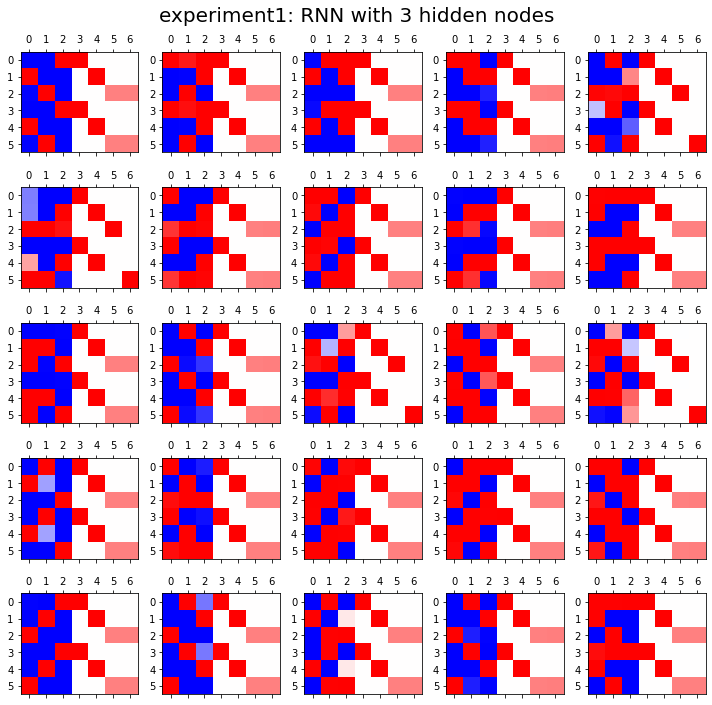

In [83]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [84]:
HIDDEN = 4

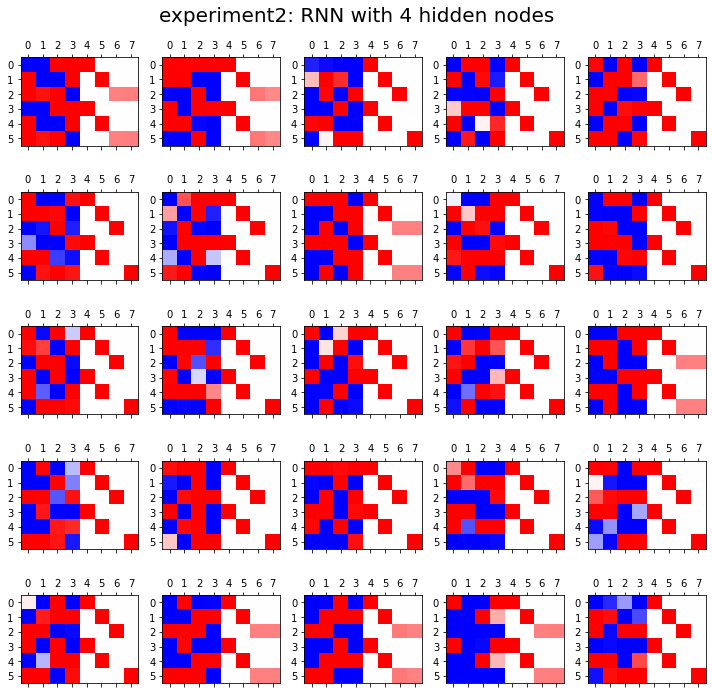

In [85]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험3

In [86]:
HIDDEN = 8

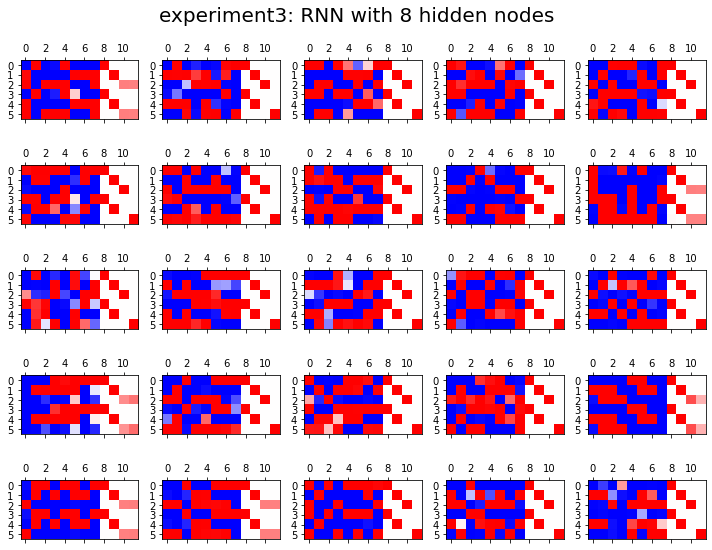

In [87]:
fig, ax = plt.subplots(5,5,figsize=(10,8))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment3: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 많으면 학습에 유리함

(서연 필기) c/C를 맞추는 것(error)보다 확실한 규칙을 맞추는
것(underline)이 중요$\to$오히려 맞추면 과적합으로 볼 수 있다 - 그래서
학습이 잘 되었으면 - 첫 칸 - 둘째 칸 - 셋쨰, 넷째 칸 - 이 순으로 predict
되었을 것

# 순환신경망 표현력 비교실험 (2)

## data: ab(c,C)

In [88]:
# torch.manual_seed(43052)
# txta = 'a'*50
# txtb = 'b'*50
# prob_upper = torch.bernoulli(torch.zeros(50)+0.5) 
# txtc = list(map(lambda x: 'c' if x==1 else 'C', prob_upper))
# txt = ''.join([txta[i]+','+txtb[i]+','+txtc[i]+',' for i in range(50)]).split(',')[:-1]
# txt_x = txt[:-1] 
# txt_y = txt[1:]
# pd.DataFrame({'txt_x':txt_x,'txt_y':txt_y}).to_csv("2022-11-25-ab(c,C).csv",index=False)

In [89]:
df= pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-ab(c%2CC).csv")
df

149 rows × 2 columns

In [90]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(df.txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(df.txt_y,mapping))).float()

In [91]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## 실험

`-` 실험1

In [92]:
HIDDEN = 3

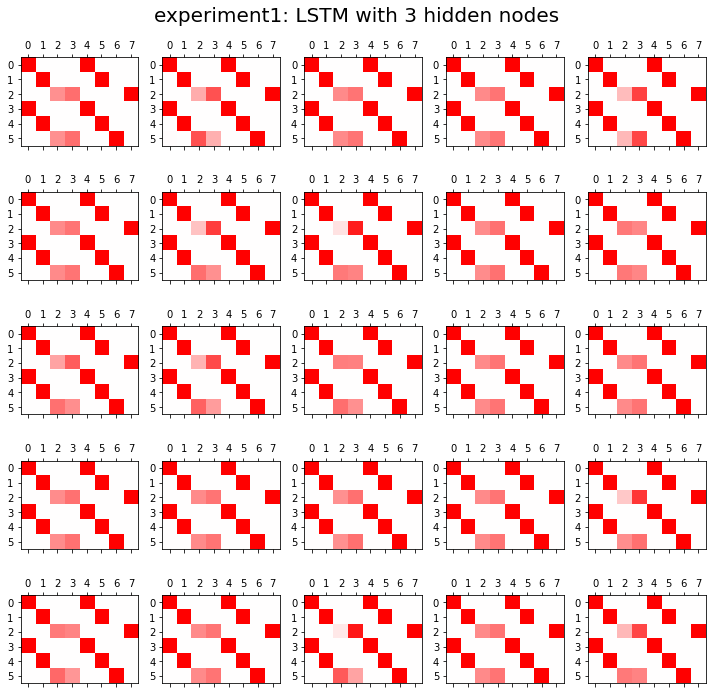

In [93]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [94]:
HIDDEN = 16

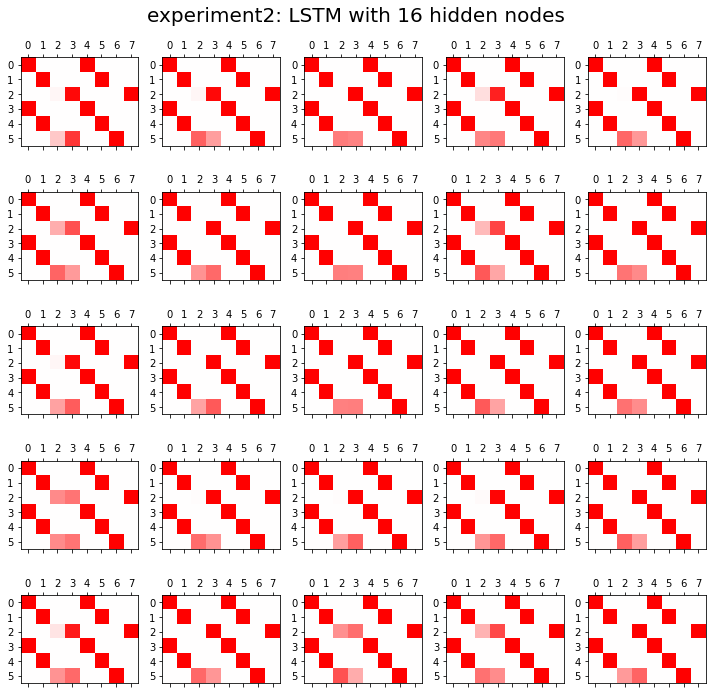

In [95]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 너무 많으면 오버피팅 경향도 있음

# 문자열에서 단어로

## data: human numbers 5

In [96]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [97]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

{',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [98]:
txt_x = txt[:-1]
txt_y = txt[1:] 

In [99]:
txt_x[0:5], txt_y[0:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [100]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## torch를 이용한 learn

In [101]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [102]:
_water = torch.zeros(1,20).to("cuda:0")
for epoc in range(50):
    ## 1 
    hidden, (hT,cT) =lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

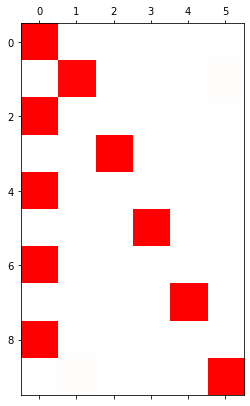

In [103]:
plt.matshow(soft(output).data[-10:].to("cpu"),cmap='bwr',vmin=-1,vmax=1)

## fastai 이용한 learn

In [104]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy 
dls = DataLoaders(dl1,dl2) 

fastai 를 이용하여 class를 사용하기 위한 목차

In [105]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [106]:
net = MyLSTM().to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()

In [107]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [108]:
lrnr.fit(50)

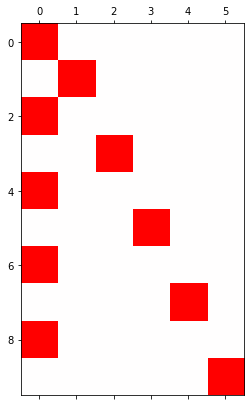

In [109]:
plt.matshow(soft(lrnr.model(x)[-10:]).data.to("cpu"),cmap = 'bwr', vmin=-1,vmax=1)

# 똑같은 코드들: `torch.nn.LSTM`

## data: hi?hello!!

In [110]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [111]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: \_water의 생략

`-` 코드1: 정석코드

In [112]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [113]:
_water = torch.zeros(1,4).to("cuda:0")
lstm(x, (_water,_water))

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드2: \_water 는 사실 없어도 괜찮았어..

In [114]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [115]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

In [116]:
x.shape

torch.Size([999, 7])

999개, 구별되는 문자 7개

## 세트2: x.shape = ($L$, $H_{in}$) or ($L$,$N$,$H_{in}$)

`-` 파라메터 설명

-   $L$ = sequece length = 시계열의 길이 = 간장을 몇 년 전통으로
    이어갈지
-   $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체
    데이터를 몇개의 시계열로 쪼갤지 \<– 왜 이걸 해야해?
-   $H_{in}$ = input_size = 시점을 고정하였을 경우 입력자료의 차원 =
    입력시계열이 시점별로 몇개의 변수로 나타내어 지는지? = 만약에
    원핫인코딩으로 단어를 정리하면 단어수를 의미함

우리가 실습했던 거 모두 N이 1이었다 그래서 안 썼음 - 1일 때만 아래와
같이 여러 버전 가능

`-` 코드2: \_water 는 사실 없어도 괜찮았어..

In [117]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [118]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드3: x의 차원은 사실 엄밀하게는 ($L$,$N$,$H_{in}$) 와 같다…

In [119]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [120]:
lstm(x.reshape(999,1,7))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 코드4: `batch_first=True`옵션을 사용하여 lstm을 만든경우

In [121]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4,batch_first=True).to("cuda:0")

In [122]:
lstm(x.reshape(1,999,7))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563],
          [-0.0786, -0.1430, -0.0250,  0.1189],
          [-0.0300, -0.2256, -0.1324,  0.1439],
          ...,
          [-0.0723,  0.0620,  0.1913,  0.2015],
          [-0.1155,  0.0746,  0.1747,  0.2938],
          [-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

## 세트3: hidden.shape = ($D\times$ `num_layers`, $H_{out}$) or ($D\times$ `num_layers`, $N$, $H_{out}$)

`-` 파라메터 설명

-   $D$ = 2 if bidirectional=True otherwise 1 = 양방향이면 2, 단방향이면
    1 (우리는 단방향만 배움)
-   `num_layres` = 중첩된 RNN일 경우 (우리는 중첩을 안시켰음)
-   $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체
    데이터를 몇개의 시계열로 쪼갤지 \<– 왜 이걸 해야해?
-   $H_{out}$ = 히든노드의 수

`-` 코드5: x.shape = ($L$,$1$,$H_{in}$) $\to$ hidden.shape =
($1$,$1$,$H_{out}$)

In [123]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [124]:
_water = torch.zeros(1,1,4).to("cuda:0") 
lstm(x.reshape(999,1,7),(_water,_water))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 사실 \_water.shape = (1,$H_{out}$) 에서 1은 observation의 차원을
의미하는게 아님 (그런데 대충 그렇게 생각해도 무방함)

-   한 시점의 콩물에 대하여 양방향으로 간장을 만들면 \_water.shape =
    (2,h)
-   한 시점의 콩물에 대하여 3중첩으로 간장을 만들면 \_water.shape =
    (3,h)
-   한 시점의 콩물에 대하여 3중첩간장을 양방향으로 만들면 \_water.shape
    = (6,h)

# 똑같은 코드들: `torch.nn.LSTMCell`

## data: hi?hello!!

In [125]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [126]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: \_water의 생략

`-` 코드1: 정석코드

In [127]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [128]:
xt = x[[1]]
_water = torch.zeros(1,4).to("cuda:0")
xt.shape, _water.shape

(torch.Size([1, 7]), torch.Size([1, 4]))

In [129]:
lstmcell(xt,(_water,_water))

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드2: \_water의 생략

In [130]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [131]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [132]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

## 세트2: xt.shape = ($N$,$H_{in}$) or ($H_{in}$)

n: timeserie 개수, 1일 경우 생략 가능

`-` 코드2: \_water의 생략

In [133]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [134]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [135]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드3:

In [136]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [137]:
xt = x[1]
xt.shape

torch.Size([7])

In [138]:
lstmcell(xt)

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

(1,n)의 형태라면 괄호 하나 빼도 가능

## 세트3: hidden.shape = ($N$,$H_{out}$) or ($H_{out}$)

`-` 코드4: xt.shape = ($H_{out}$) $\to$ \_water.shape = $(H_{out})$

In [139]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [140]:
xt = x[1]
_water = torch.zeros(4).to("cuda:0")
xt.shape,_water.shape

(torch.Size([7]), torch.Size([4]))

In [141]:
lstmcell(xt, (_water,_water))

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

# Summary

## 똑같은 코드들 정리

`-` 원래 1은 단순히 observation의 차원이 아니다. 즉
${\bf X}_{n \times p}$에서 $n$에 대응하는 차원으로 생각할 수 없다.

`-` 그런데 (1) 단방향 (2) 조각내지 않은 시계열 (3) 중첩하지 않은
순환망에 한정하여서는 observation 처럼 생각해도 무방하다. \<– 엄밀하게는
이게 위험한 생각임. 하지만 정식으로 모두 따지려면 너무 헷갈림

## 실제구현시 기억할 것

`-` 현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이
없다. (느리거든요) // 그냥 이해용으로 구현

`-` torch.nn.RNN 혹은 torch.nn.LSTM 으로 네트워크를 구성할시 \_water의
dim을 명시할 일도 없다.

`-` 오로지 고려해야 할 것은 입력시계열을 조각낼지 조각내지 않을지

# 조각난 시계열로 학습

시계열이 무조건 연속으로서 데이터가 존재하지 않는다면? - 댓글 1의 길이는
400 - 댓글 2 의 길이는 100 이럴수도

## data

In [142]:
txt = list('hi!')*3 + list('hi?')*3 

## 조각내지 않은 시계열

In [143]:
txt_x = txt[:-1] 
txt_y = txt[1:] 

In [144]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [145]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [146]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [147]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

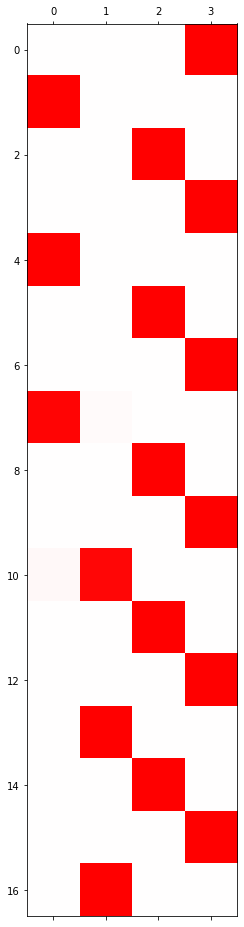

In [148]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

첫번째 stack은 hi!로 학습 두번째 stack은 hi?로 학습하여 결과가 이럼

## 조각난 시계열

In [149]:
txt1= txt[:9]
txt2= txt[9:]

In [150]:
txt1,txt2

(['h', 'i', '!', 'h', 'i', '!', 'h', 'i', '!'],
 ['h', 'i', '?', 'h', 'i', '?', 'h', 'i', '?'])

In [151]:
txt1_x = txt1[:-1] 
txt1_y = txt1[1:] 
txt2_x = txt2[:-1] 
txt2_y = txt2[1:] 

In [152]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda:0")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda:0")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda:0")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda:0")

9에서 하나씩 빼서 x,y 만들었으니까 8

In [153]:
x1.shape, y1.shape, x2.shape, y2.shape

(torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]))

In [154]:
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)
xx.shape, yy.shape

(torch.Size([8, 2, 4]), torch.Size([8, 2, 4]))

In [155]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [156]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [157]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(xx) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

첫번째 stzck 과 두번째 stack의 합

``` python
  loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
```

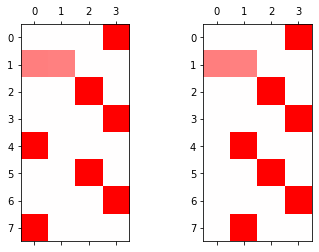

In [158]:
fig , ax = plt.subplots(1,2) 
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

xx로 학습한 것들인데 만약 x를 넣는다면?

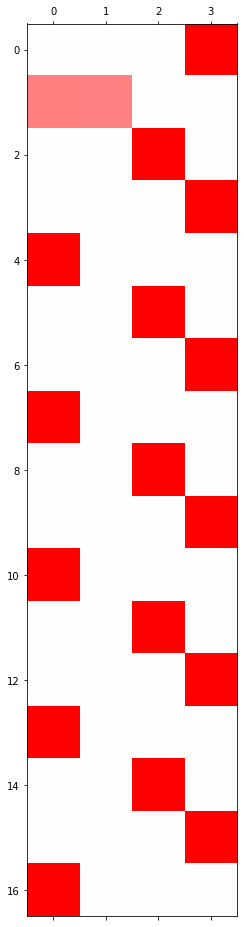

In [159]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

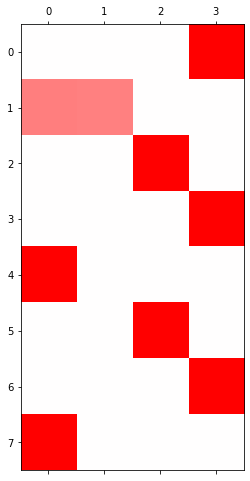

In [162]:
hidden, _ = lstm(x1)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

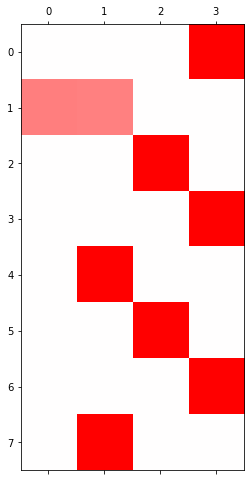

In [163]:
hidden, _ = lstm(x2)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

In [160]:
hidden.shape

torch.Size([17, 10])

In [161]:
linr(hidden).shape

torch.Size([17, 4])

`-` 조각난 시계열로 학습한 경우는 hi!에서 hi?로 바뀔 수 없다. 왜냐햐면
그러한 연결정보가 끊어져 있으니까

## 재미있는 실험

`-` x1만 배운다면?

In [172]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [173]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [175]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x1) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y1)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

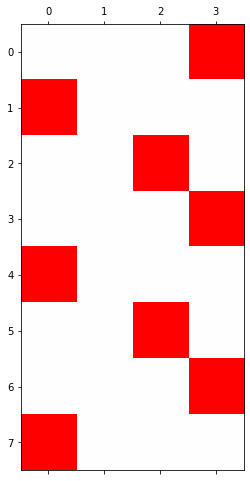

In [176]:
hidden, _ = lstm(x2)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

`-` x2만 배운다면?

In [191]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [192]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [193]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x2) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y2)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

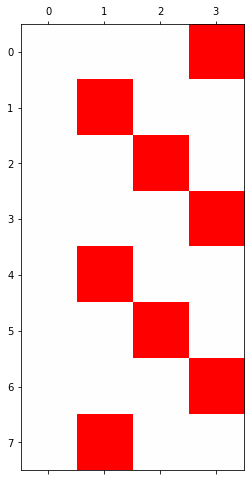

In [195]:
hidden, _ = lstm(x1)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

# 똑같은 코드들 fastai, pytorch

## data: human numbers 5

In [196]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [197]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

{',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [198]:
txt_x = txt[:-1]
txt_y = txt[1:] 

In [199]:
txt_x[0:5], txt_y[0:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [200]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## fastai 이용한 learn

``` python
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)
```

한 뭉치에 몇 개 있는지

``` python
torch.nn.LSTM(batxh_size)
```

몇 개로 나눠져 있는지

In [215]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy 
dls = DataLoaders(dl1,dl2) 

In [216]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(43052)
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [217]:
net = MyLSTM().to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()

In [218]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [219]:
lrnr.fit(10)

In [220]:
soft(lrnr.model(x)).data.to("cpu").numpy().round(3)

array([[0.935, 0.009, 0.015, 0.011, 0.016, 0.014],
       [0.133, 0.164, 0.242, 0.172, 0.141, 0.147],
       [0.982, 0.003, 0.004, 0.003, 0.004, 0.003],
       ...,
       [0.122, 0.171, 0.242, 0.174, 0.146, 0.144],
       [0.984, 0.003, 0.004, 0.002, 0.004, 0.003],
       [0.119, 0.172, 0.244, 0.175, 0.144, 0.145]], dtype=float32)

## torch를 이용한 learn

In [230]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

optim으로 adam 사용

In [231]:
for epoc in range(10):
    ## 1 
    hidden, _ = lstm(x)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

In [232]:
hidden, _ = lstm(x)
output = linr(hidden) 
soft(output).data.to("cpu").numpy().round(3)

array([[0.935, 0.009, 0.015, 0.011, 0.016, 0.014],
       [0.133, 0.164, 0.242, 0.172, 0.141, 0.147],
       [0.982, 0.003, 0.004, 0.003, 0.004, 0.003],
       ...,
       [0.122, 0.171, 0.242, 0.174, 0.146, 0.144],
       [0.984, 0.003, 0.004, 0.002, 0.004, 0.003],
       [0.119, 0.172, 0.244, 0.175, 0.145, 0.145]], dtype=float32)

# human numbers 100

In [789]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-human_numbers_100.csv')
df

2000 rows × 1 columns

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. - is_lm
= True 로 설정할 것 - seq_len = 5 로 설정할 것

(풀이)

In [791]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=5,text_col='text')
dls.show_batch()

`(2)` lrnr 오브젝트를 만들어라. - arch = AWD_LSTM 이용 - metrics =
accuracy 이용

(풀이)

In [51]:
lrnr = language_model_learner(dls, arch= AWD_LSTM, metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라.

(풀이)

In [53]:
lrnr.fine_tune(3)

`(4)` ‘one , two ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [56]:
lrnr.predict('one, two,', n_words=50) 

'one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five'

`(5)` ‘twenty , twenty one ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [57]:
lrnr.predict('twenty, twenty one,', n_words=50) 

'twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight ,'